In [19]:
import pandas as pd
pd.options.display.max_columns = None # para que me muestre las 20 y pico columnas

df_original = pd.read_csv('AUTOS.csv')
df = df_original.copy() #tengo una copia que no modifica al original
#df.head()
print(df.columns)
print(df['engine-type'])

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling'],
      dtype='object')
0      dohc
1      dohc
2      ohcv
3       ohc
4       ohc
       ... 
200     ohc
201     ohc
202    ohcv
203     ohc
204     ohc
Name: engine-type, Length: 205, dtype: object


In [20]:
new_names = {'normalized-losses':'losses', 'make':'brand', 'fuel-type':'type', 'num-of-doors':'doors', 'body-style':'body', 'drive-wheels':'drive-wheels', 'engine-location':'traction', 'wheel-base':'wheel-base', 'length':'length',
       'width':'width', 'height':'height', 'curb-weight':'curb-weight', 'engine-type':'engine-type', 'num-of-cylinders':'cylinders',
       'engine-size':'engine-size', 'fuel-system':'fuel-system', 'bore':'bore', 'stroke':'stroke', 'compression-ratio':'compression-ratio',
       'horsepower':'horsepower', 'peak-rpm':'peak-rpm', 'city-mpg':'city-mpg', 'highway-mpg':'highway-mpg', 'price':'price',
       'symboling':'symboling'}

df = df.rename(columns=new_names)
df.head()

,losses,brand,type,aspiration,doors,body,drive-wheels,traction,wheel-base,length,width,height,curb-weight,engine-type,cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   losses             164 non-null    float64
 1   brand              205 non-null    object 
 2   type               205 non-null    object 
 3   aspiration         205 non-null    object 
 4   doors              203 non-null    object 
 5   body               205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   traction           205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  cylinders          205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [22]:
df.describe(include='all')

,losses,brand,type,aspiration,doors,body,drive-wheels,traction,wheel-base,length,width,height,curb-weight,engine-type,cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
count,164.000000,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
unique,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000


In [32]:
print("Duplicated rows: \n")

duplicated_rows = df[df.duplicated()]

for index in duplicated_rows.index:
    print(f"Row {index} is duplicated\n")

Duplicated rows: 



In [41]:
string_columns = []

for column in df.columns:
    if df[column].dtype == "object":
        string_columns.append(column)
        
print(string_columns)

['brand', 'type', 'aspiration', 'doors', 'body', 'drive-wheels', 'traction', 'engine-type', 'cylinders', 'fuel-system']


In [42]:
#chequear que no hayan campos strings con los siguientes nombres:
null_names = ["null", "None", "N/A", "NA", "NaN", "", "NIL", "NUL", "NULL", "EMPTY", "BLANK", "UNDEFINED", "MISSING", "UNKNOWN", "VOID", "NOT APPLICABLE", "NOT AVAILABLE", "NOT PROVIDED", "NOT SET"]

print("nulos en columnas 'doors': \n")
#debo chequear columnas strings 
for index, row in df.iterrows():
    for string_column in string_columns:
        if row[string_column] in null_names:
            print(f"Row {index} is null at column {string_column}\n")

nulos en columnas 'doors': 



In [38]:
print(df.shape) #filas, columnas

(205, 26)


In [59]:
hash_numbers = {"one":"1", "two":"2", "three":"3", "four":"4", "five":"5", "six":"6", "seven":"7", "eight":"8", "nine":"9", "ten":"10", "eleven": "11", "twelve": "12"}

for index, row in df.iterrows():
    df.at[index, 'cylinders'] = hash_numbers[row['cylinders']]
    #esto no modifica la df # row['cylinders'] = hash_numbers[row['cylinders']]
    
df.sample(10)

KeyError: 4.0

In [60]:
df['cylinders'] = df['cylinders'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   losses             164 non-null    float64
 1   brand              205 non-null    object 
 2   type               205 non-null    object 
 3   aspiration         205 non-null    object 
 4   doors              203 non-null    object 
 5   body               205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   traction           205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  cylinders          205 non-null    int32  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

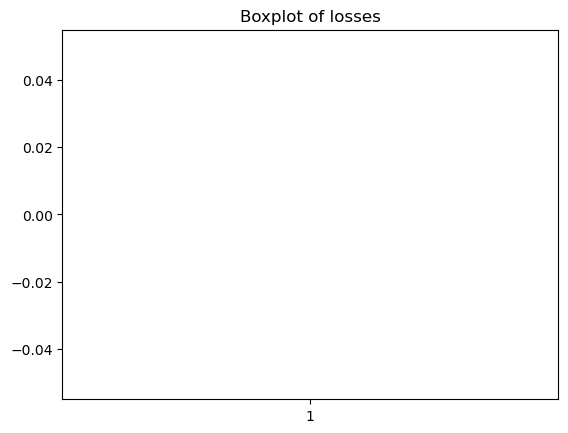

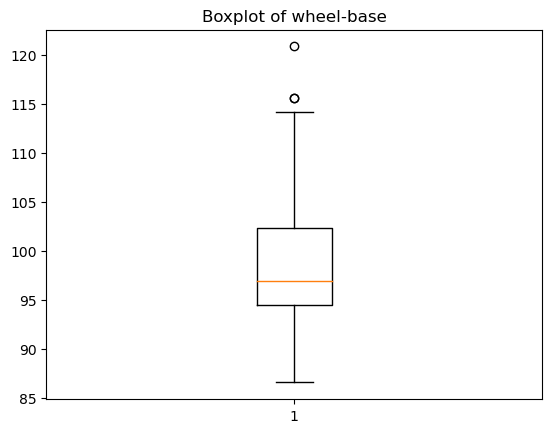

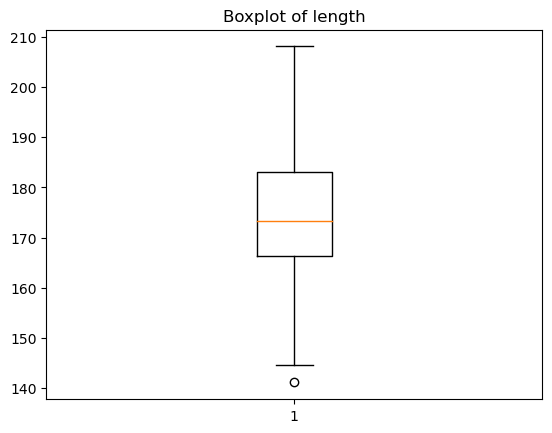

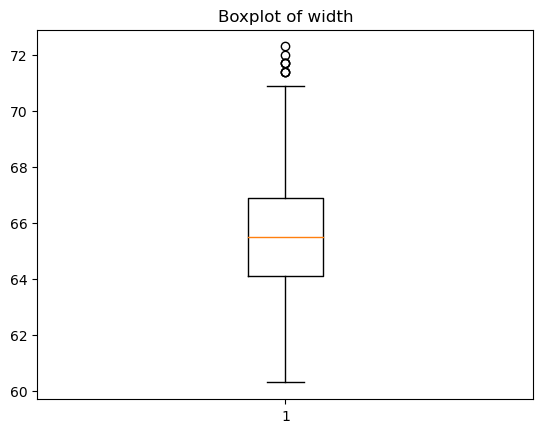

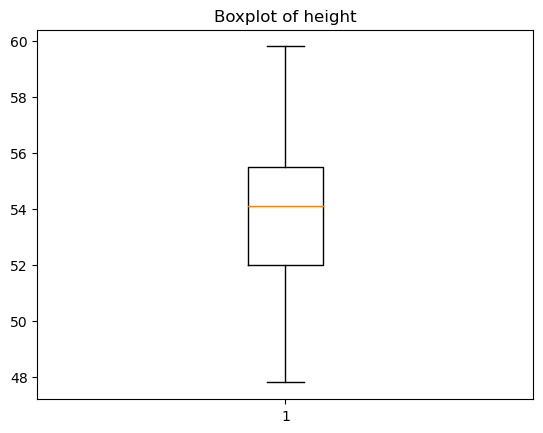

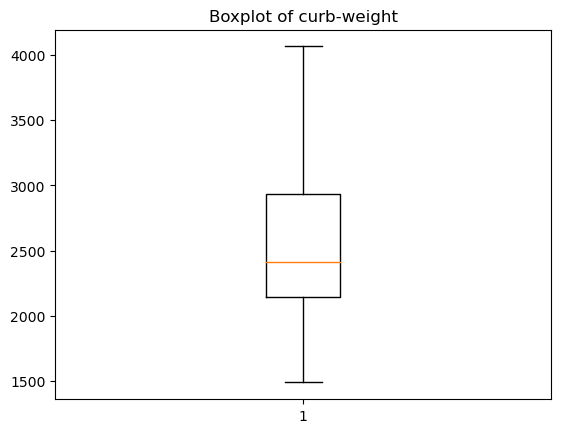

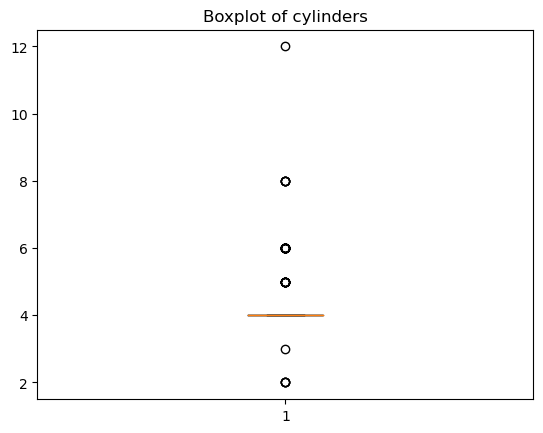

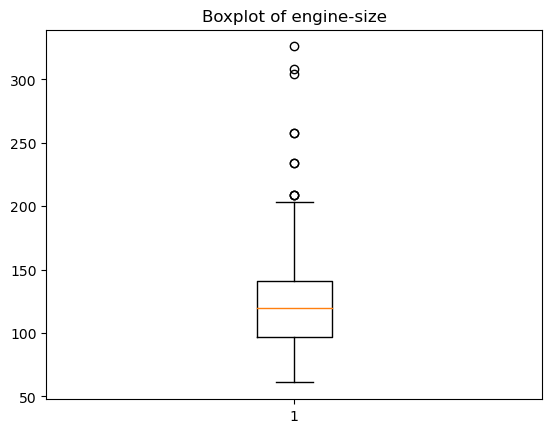

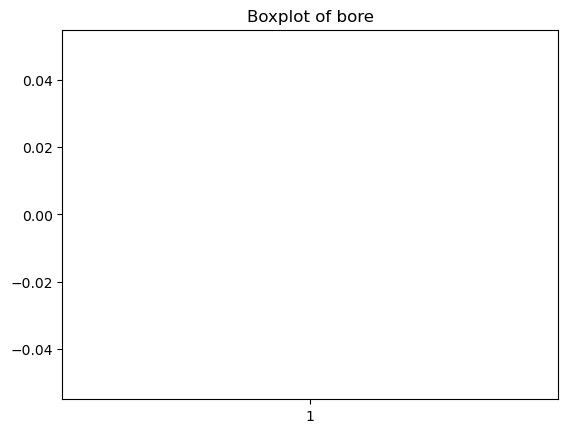

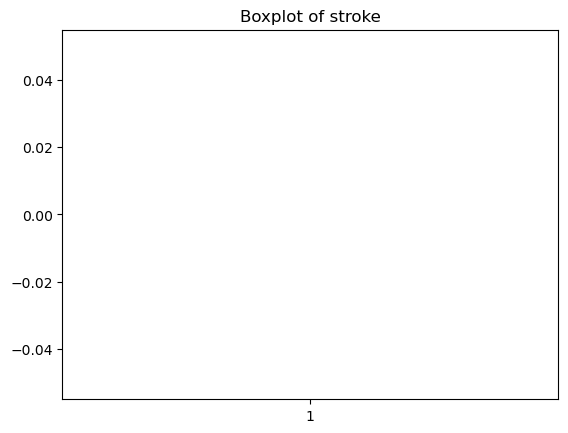

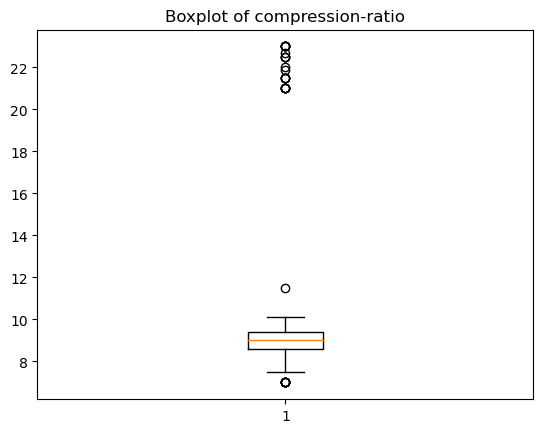

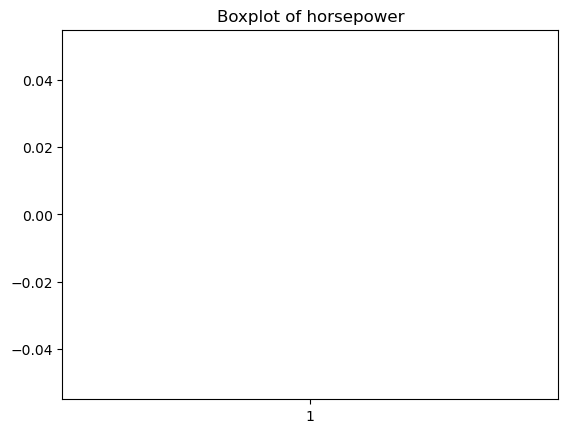

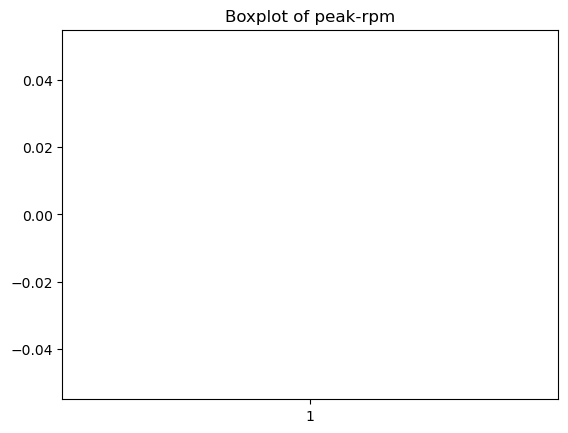

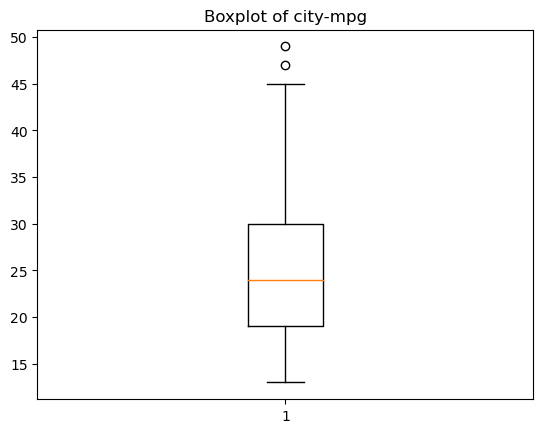

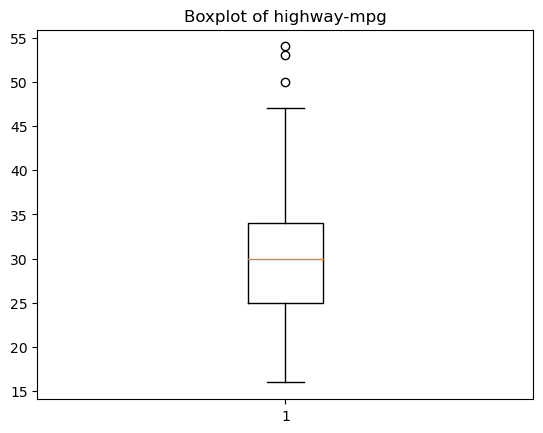

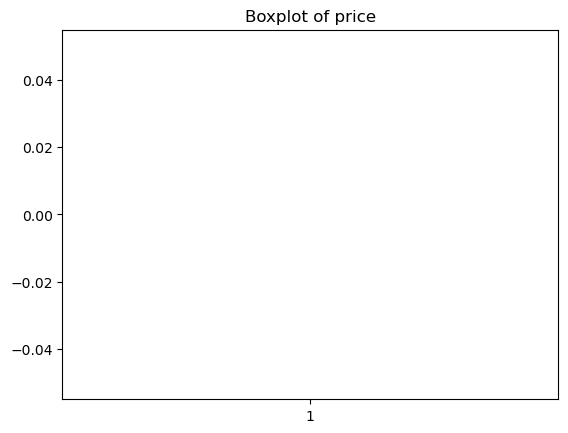

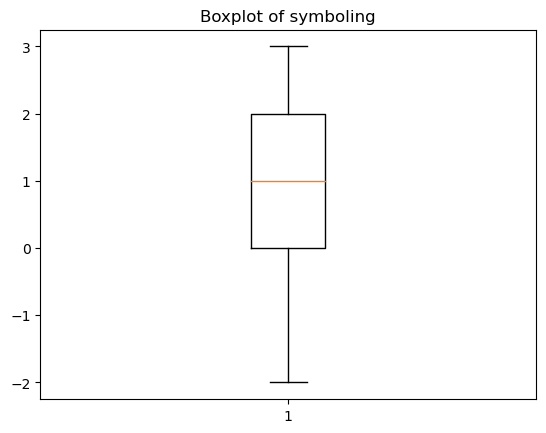

In [77]:
#vamos a revisar si hay valores atípicos para cada columna -> como no se del tema elijo no eliminar atípicos
import matplotlib.pyplot as plt
for column in df.columns:
    if df[column].dtype != "object":
        plt.figure()  
        plt.title(f'Boxplot of {column}')
        plt.boxplot(df[column])

In [92]:
#hay filas con nulos y estos no se deben a una causa lógica y parece ser de forma random sin un patrón presente, por lo cual procedo a eliminar los las filas con algún nulo

null_rows = df[df.isnull().any(axis=1)]
cant_filas = null_rows.shape[0]
print(cant_filas)
null_rows.head(cant_filas - 1)

#debo volver a asingar el número de índice ...

46


,losses,brand,type,aspiration,doors,body,drive-wheels,traction,wheel-base,length,width,height,curb-weight,engine-type,cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
5,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,2
7,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,1
9,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,0
14,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,6,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0,1
15,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,0
16,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0,0
17,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,0
